# **1. Loading Packages and Data**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

# **Exploratory Data Analysis**

In [121]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [122]:
df_train.shape

(8523, 12)

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [124]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [125]:
df_train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [126]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [127]:
catgr = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [128]:
for i in catgr:
  print(i,": ",df_train[i].unique())

Item_Identifier :  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier :  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size :  ['Medium' nan 'High' 'Small']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [129]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].transform(lambda x:'Low Fat' if x in ('low fat','LF') else x)
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].transform(lambda x:'Regular' if x in ('reg') else x)

In [130]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [131]:
for i in catgr:
  print(i,": ",df_train[i].value_counts())

Item_Identifier :  FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content :  Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Item_Type :  Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier :  OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, d

In [132]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [133]:
np.round((df_train.isnull().sum()/df_train.shape[0])*100,2)

Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

# **Univariate Analysis**

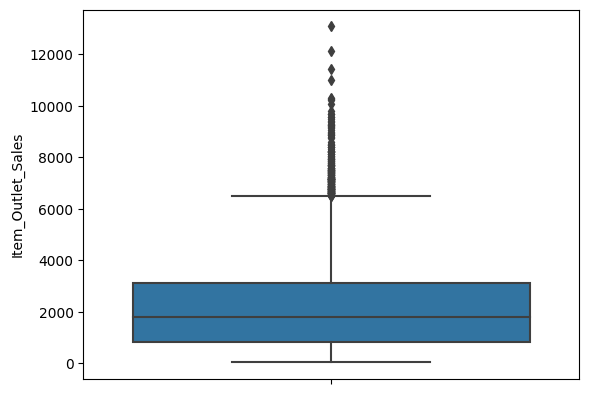

In [134]:
sns.boxplot(y='Item_Outlet_Sales',data=df_train)
plt.show()

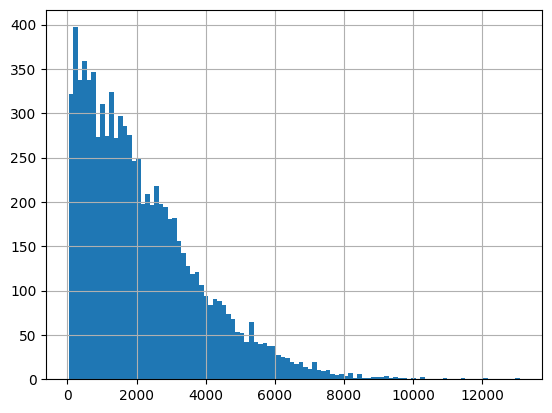

In [135]:
df_train['Item_Outlet_Sales'].hist(bins=100)
plt.show()

In [136]:
df_train[df_train['Item_Outlet_Sales'] > 10000]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,NaN,Low Fat,0.034584,Dairy,248.3750,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1450,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,NaN,Low Fat,0.088840,Snack Foods,254.2672,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4888,14.85,Regular,0.019495,Dairy,261.2910,1987,High,Tier 3,Supermarket Type1,10256.6490
5223,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,1985,Medium,Tier 3,Supermarket Type3,12117.5600
6541,NaN,Regular,0.030693,Canned,228.0352,1985,Medium,Tier 3,Supermarket Type3,10306.5840
7188,NaN,Low Fat,0.010551,Household,234.9958,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7191,NaN,Low Fat,0.044445,Household,245.2802,1985,Medium,Tier 3,Supermarket Type3,10072.8882


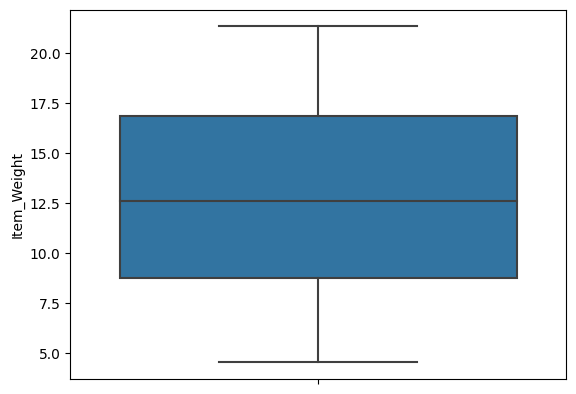

In [137]:
sns.boxplot(y='Item_Weight',data=df_train)
plt.show()

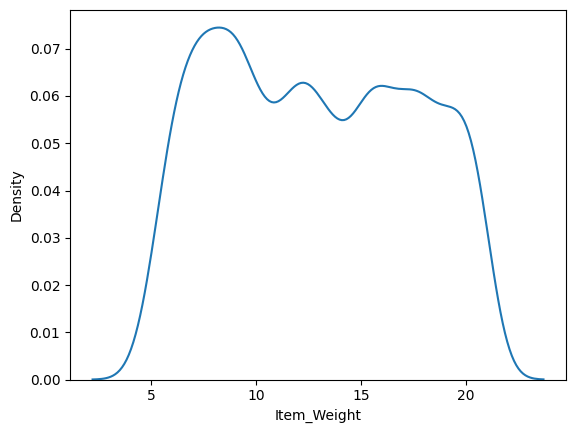

In [138]:
sns.kdeplot(x='Item_Weight',data=df_train)
plt.show()

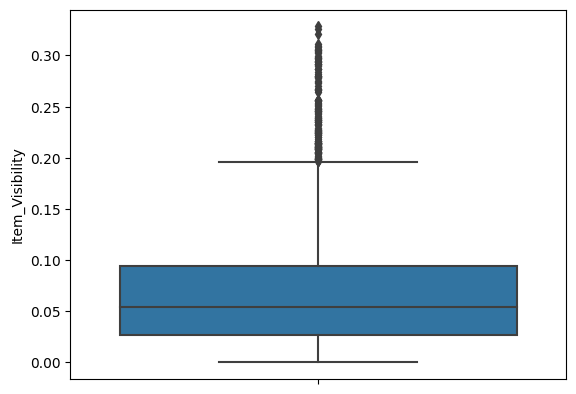

In [139]:
sns.boxplot(y='Item_Visibility',data=df_train)
plt.show()

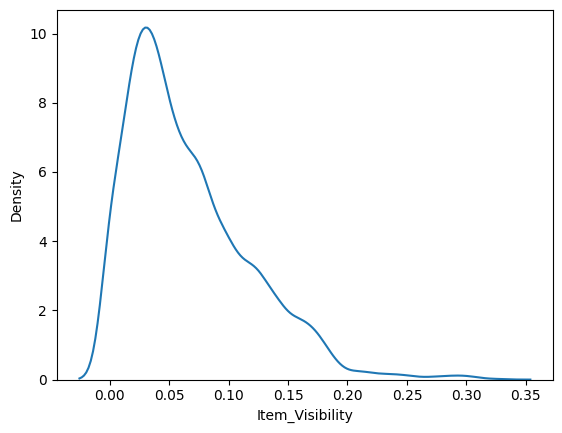

In [140]:
sns.kdeplot(x='Item_Visibility',data=df_train)
plt.show()

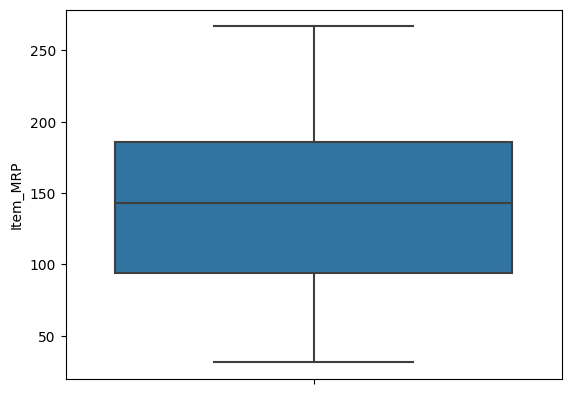

In [141]:
sns.boxplot(y='Item_MRP',data=df_train)
plt.show()

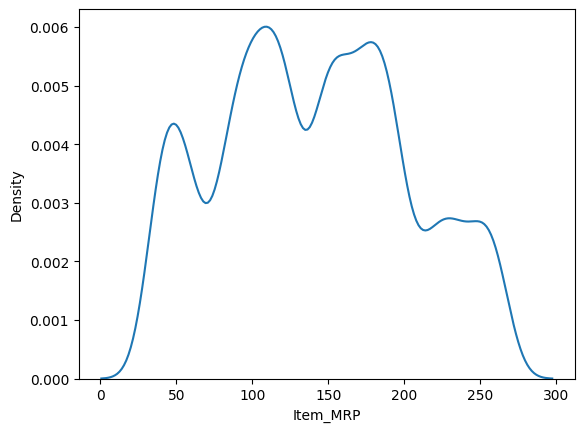

In [142]:
sns.kdeplot(x='Item_MRP',data=df_train)
plt.show()

# **Bivariate Analysis**

<ipython-input-143-12832c6ba8bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


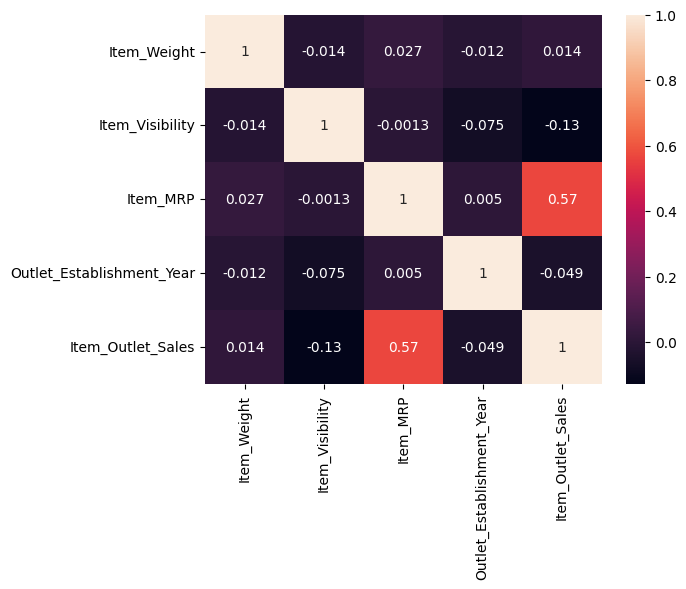

In [143]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

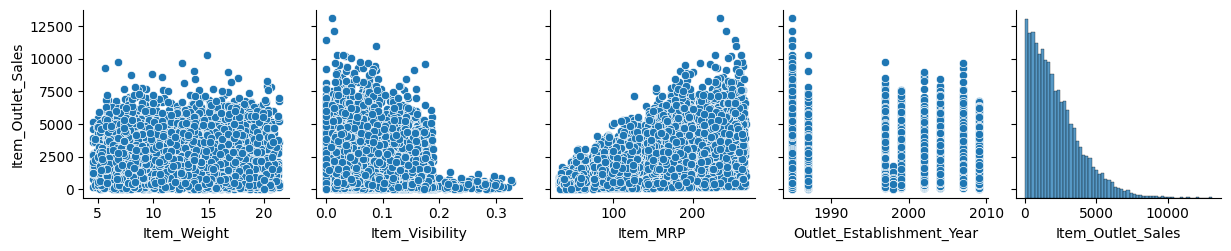

In [144]:
sns.pairplot(df_train, y_vars=["Item_Outlet_Sales"])
plt.show()

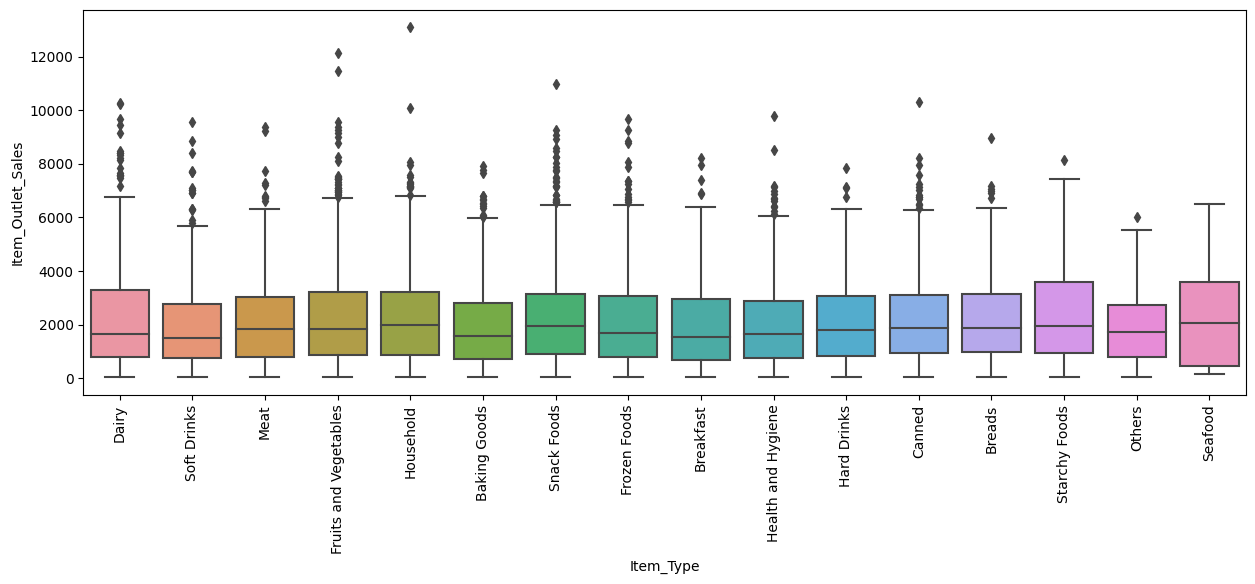

In [177]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df_train)
plt.xticks(rotation=90)
plt.show()

# **Missing Value Treatment**

In [145]:
df_train[['Item_Weight','Outlet_Size']].describe(include='all')

,Item_Weight,Outlet_Size
count,7060.000000,6113
unique,NaN,3
top,NaN,Medium
freq,NaN,2793
mean,12.857645,NaN
std,4.643456,NaN
min,4.555000,NaN
25%,8.773750,NaN
50%,12.600000,NaN
75%,16.850000,NaN


In [146]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [147]:
df_train['Item_Weight'].replace(to_replace = np.nan,value=df_train['Item_Weight'].mean(),inplace=True)

In [148]:
df_train['Outlet_Size'].replace(to_replace = np.nan,value='Medium',inplace=True)

In [149]:
df_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# **Feature Engineering**

## **1. Outlet Establishment Year**

In [150]:
current_year = 2023
age = current_year - df_train['Outlet_Establishment_Year']

In [151]:
df_train['Outlet_Establishment_Year'] = age

In [152]:
df_train.rename({'Outlet_Establishment_Year':'Outlet_Age'},axis=1,inplace=True)

## **2. One hot Encoding**

In [153]:
cat_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Type']
for col in cat_cols:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[col], drop_first=True, prefix=col)], axis=1)
df_train.drop(columns=cat_cols, inplace=True)

In [154]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Age',
       'Outlet_Size', 'Item_Outlet_Sales', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [155]:
df_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,Dairy,249.8092,24,Medium,3735.1380,0,0,0,1,0,0
1,5.92,0.019278,Soft Drinks,48.2692,14,Medium,443.4228,1,0,1,0,1,0
2,17.50,0.016760,Meat,141.6180,24,Medium,2097.2700,0,0,0,1,0,0
3,19.20,0.000000,Fruits and Vegetables,182.0950,25,Medium,732.3800,1,0,1,0,0,0
4,8.93,0.000000,Household,53.8614,36,High,994.7052,0,0,1,1,0,0


## **3. Numeric Encoding**

In [156]:
df_train['Outlet_size_encoded'] = df_train['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [158]:
df_train[['Outlet_Size','Outlet_size_encoded']]

,Outlet_Size,Outlet_size_encoded
0,Medium,1
1,Medium,1
2,Medium,1
3,Medium,1
4,High,2
...,...,...
8518,High,2
8519,Medium,1
8520,Small,0
8521,Medium,1


In [159]:
df_train.drop('Outlet_Size',axis=1,inplace=True)

In [166]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [178]:
df_train.drop('Item_Type',axis=1,inplace=True)

## **4. Scaling**

In [179]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df_train)
std_data = pd.DataFrame(df_train, columns=df_train.columns)
std_data.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_size_encoded
count,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,25.168,2181.289,0.353,0.327,0.393,0.654,0.109,0.110,0.829
std,4.226,0.052,62.275,8.372,1706.500,0.478,0.469,0.488,0.476,0.312,0.313,0.600
min,4.555,0.000,31.290,14.000,33.290,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,9.310,0.027,93.826,19.000,834.247,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,12.858,0.054,143.013,24.000,1794.331,0.000,0.000,0.000,1.000,0.000,0.000,1.000
75%,16.000,0.095,185.644,36.000,3101.296,1.000,1.000,1.000,1.000,0.000,0.000,1.000
max,21.350,0.328,266.888,38.000,13086.965,1.000,1.000,1.000,1.000,1.000,1.000,2.000


# **Modelling**

## **1. Linear Regression**

In [193]:
X = df_train.drop('Item_Outlet_Sales',axis=1).values
y = np.array(df_train['Item_Outlet_Sales']).reshape(8523,1)

In [189]:
X.shape

(8523, 11)

In [194]:
y.shape

(8523, 1)

In [197]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression()
model.fit(X,y)

y_hat = model.predict(X)

In [202]:
model.score(X,y).round(3)

0.562

## **2. Regularized Linear Regression**

In [203]:
from sklearn.linear_model import Ridge

In [223]:
modelR = Ridge(alpha = 20)
modelR.fit(X,y)
y_hat = modelR.predict(X)

In [224]:
modelR.score(X,y).round(3)

0.562

In [209]:
from sklearn.linear_model import Lasso

In [227]:
modelL = Lasso(alpha = 2)
modelL.fit(X,y)
y_hat = modelL.predict(X)

In [228]:
modelL.score(X,y).round(3)

0.562

## **3. Random Forest**

In [231]:
X = df_train.drop('Item_Outlet_Sales',axis=1).values
y = np.array(df_train['Item_Outlet_Sales'])

In [229]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
model = RandomForestRegressor()
model.fit(X,y)
model.score(X,y).round(3)

0.937

## **4. XGBoost**

In [235]:
from xgboost import XGBRegressor

In [236]:
model = XGBRegressor()
model.fit(X,y)
model.score(X,y)

0.8414403763352893

# **Summary**

As we can see, among all the models Random Forest outperforms the rest.